# Trying it out: my own data 



## 1. Preparing the data

### Gathering and loading the data

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%matplotlib inline


In [2]:
import os
os.chdir('C:/Users/jasper.kuller/Udacity/Project_1_blogpost')

In [3]:
beers_raw = pd.read_csv('Data/Untappd/20200205_export_jk.csv')
beers_raw.describe()

,beer_abv,beer_ibu,venue_lat,venue_lng,rating_score,purchase_venue,checkin_id,bid,brewery_id,global_rating_score,global_weighted_rating_score,total_toasts,total_comments
count,427.000000,427.000000,256.000000,256.000000,384.000000,0.0,4.270000e+02,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000
mean,6.435152,25.255269,49.165191,0.832045,3.228516,NaN,5.118869e+08,6.853097e+05,41826.391101,3.443513,3.468923,0.803279,0.100703
std,1.728012,25.101446,5.186930,19.873734,0.737180,NaN,2.231865e+08,9.376225e+05,80508.490850,0.337279,0.325827,1.020305,0.377382
min,0.000000,0.000000,36.067200,-115.177000,0.500000,NaN,1.683053e+08,2.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,47.447100,3.257030,3.000000,NaN,2.858136e+08,8.653000e+03,388.500000,3.270000,3.330000,0.000000,0.000000
50%,6.000000,22.000000,52.075700,4.487940,3.250000,NaN,5.432986e+08,8.041800e+04,3359.000000,3.470000,3.500000,0.000000,0.000000
75%,7.500000,38.000000,52.164500,4.895905,3.750000,NaN,6.964939e+08,1.334346e+06,32280.000000,3.640000,3.640000,1.000000,0.000000
max,11.900000,250.000000,53.348100,28.227400,5.000000,NaN,8.603580e+08,3.537592e+06,389645.000000,4.530000,4.530000,5.000000,3.000000


In [4]:
pd.set_option('display.max_columns', len(beers_raw.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
beers_raw.head(3)

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,comment,venue_name,venue_city,venue_state,venue_country,venue_lat,venue_lng,rating_score,created_at,checkin_url,beer_url,brewery_url,brewery_country,brewery_city,brewery_state,flavor_profiles,purchase_venue,serving_type,checkin_id,bid,brewery_id,photo_url,global_rating_score,global_weighted_rating_score,tagged_friends,total_toasts,total_comments
0,Super Bock,Unicer Bebidas,Lager - Euro Pale,5.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 00:08:59,https://untappd.com/c/168305269,https://untappd.com/beer/8048,https://untappd.com/brewery/1308,Portugal,Matosinhos Municipality,Norte,NaN,NaN,NaN,168305269,8048,1308,NaN,2.97,2.98,NaN,0,0
1,1664,Kronenbourg Brewery,Lager - Euro Pale,5.5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 00:09:29,https://untappd.com/c/168305415,https://untappd.com/beer/5939,https://untappd.com/brewery/203,France,Strasbourg,Grand-Est,NaN,NaN,NaN,168305415,5939,203,NaN,3.11,3.11,NaN,0,0
2,Stella Artois,Stella Artois,Lager - Euro Pale,5.0,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-01 00:09:48,https://untappd.com/c/168305509,https://untappd.com/beer/4010,https://untappd.com/brewery/265,Belgium,Leuven,Vlaanderen,NaN,NaN,NaN,168305509,4010,265,NaN,3.25,3.25,NaN,0,0


### Cleaning 
Dropping columns that are not useful for predicting ratings.

In [5]:
cols_to_drop = ['checkin_url','beer_url','brewery_url','checkin_id','brewery_id','photo_url']
beers = beers_raw.drop(cols_to_drop, axis=1)

Handling missing values.

In [6]:
beers.isna().sum()

beer_name                         0
brewery_name                      0
beer_type                         0
beer_abv                          0
beer_ibu                          0
comment                         293
venue_name                      171
venue_city                      196
venue_state                     196
venue_country                   171
venue_lat                       171
venue_lng                       171
rating_score                     43
created_at                        0
brewery_country                   0
brewery_city                     14
brewery_state                    20
flavor_profiles                 397
purchase_venue                  427
serving_type                    198
bid                               0
global_rating_score               0
global_weighted_rating_score      0
tagged_friends                  388
total_toasts                      0
total_comments                    0
dtype: int64

In [7]:
# dropping columns we won't need for our analysis
beers.drop(['comment','tagged_friends','purchase_venue','flavor_profiles','venue_name','venue_city','venue_state','total_toasts','total_comments'], axis=1, inplace=True)

In [8]:
# coordinates are not required for running the model, so these are dropped
beers.drop(['venue_lat','venue_lng'], axis=1, inplace=True)

In [9]:
# missing ratings are beers I added to get the list going -- these need to be dropped as they don't have predictive value  
beers.dropna(subset=['rating_score'], inplace=True)

In [10]:
# replacing missing categorical values with fillna
beers.fillna("Missing", inplace=True)

beers.isna().sum()

beer_name                       0
brewery_name                    0
beer_type                       0
beer_abv                        0
beer_ibu                        0
venue_country                   0
rating_score                    0
created_at                      0
brewery_country                 0
brewery_city                    0
brewery_state                   0
serving_type                    0
bid                             0
global_rating_score             0
global_weighted_rating_score    0
dtype: int64

### Transforming 
Binning & one hot encoding


In [11]:
beers.dtypes

beer_name                        object
brewery_name                     object
beer_type                        object
beer_abv                        float64
beer_ibu                          int64
venue_country                    object
rating_score                    float64
created_at                       object
brewery_country                  object
brewery_city                     object
brewery_state                    object
serving_type                     object
bid                               int64
global_rating_score             float64
global_weighted_rating_score    float64
dtype: object

In [12]:
cat_beers = beers.select_dtypes(include=['object']).copy()
num_beers = beers.select_dtypes(include=['float64','int64']).copy()

In [13]:
cat_beers.describe()

,beer_name,brewery_name,beer_type,venue_country,created_at,brewery_country,brewery_city,brewery_state,serving_type
count,384,384,384,384,384,384,384,384,384
unique,312,190,67,13,384,23,150,74,5
top,IPA,Brouwerij 't IJ,IPA - American,Nederland,2015-11-25 22:35:12,Netherlands,Amsterdam,Noord-Holland,Missing
freq,9,15,36,161,1,162,41,73,155


Of the categorical variables, a couple might be relevant for predicting ratings: 
- beer_type
- venue_country (perhaps?)
- brewery_country
- serving_type (perhaps?)

Problem is, there are too many unique values per variable. Solution: creating umbrella values.

In [14]:
pd.set_option('display.max_rows', 150)
beertype = beers['beer_type'].unique()
sorted(beertype)

['Barleywine - American',
 'Barleywine - English',
 'Barleywine - Other',
 'Belgian Blonde',
 'Belgian Dubbel',
 'Belgian Quadrupel',
 'Belgian Strong Dark Ale',
 'Belgian Strong Golden Ale',
 'Belgian Tripel',
 'Bière de Garde',
 'Blonde Ale',
 'Bock - Doppelbock',
 'Bock - Hell / Maibock / Lentebock',
 'Bock - Single / Traditional',
 'Brown Ale - Belgian',
 'Brown Ale - Imperial / Double',
 'Brown Ale - Other',
 'Dunkelweizen',
 'English Bitter',
 'Farmhouse Ale - Saison',
 'Fruit Beer',
 'Gluten-Free',
 'Golden Ale',
 'Hefeweizen',
 'IPA - American',
 'IPA - Belgian',
 'IPA - Black / Cascadian Dark Ale',
 'IPA - Brut',
 'IPA - English',
 'IPA - Imperial / Double',
 'IPA - Imperial / Double New England',
 'IPA - International',
 'IPA - New England',
 'IPA - Rye',
 'IPA - Session / India Session Ale',
 'IPA - Triple',
 'IPA - White',
 'Lager - Amber',
 'Lager - American',
 'Lager - American Amber / Red',
 'Lager - American Light',
 'Lager - Dark',
 'Lager - Euro Pale',
 'Lager - Euro 

In [15]:
# grouping beer styles in larger bins
beers.loc[beers['beer_type'].str.contains('barley', case=False), 'beer_type'] = 'Barleywine'
beers.loc[beers['beer_type'].str.contains('brown ale', case=False), 'beer_type'] = 'Brown Ale'
beers.loc[beers['beer_type'].str.contains('ipa', case=False), 'beer_type'] = 'IPA'
beers.loc[beers['beer_type'].str.contains('lager', case=False), 'beer_type'] = 'Lager'
beers.loc[beers['beer_type'].str.contains('pale ale', case=False), 'beer_type'] = 'Pale Ale'
beers.loc[beers['beer_type'].str.contains('pilsner', case=False), 'beer_type'] = 'Pilsner'
beers.loc[beers['beer_type'].str.contains('red ale', case=False), 'beer_type'] = 'Red Ale'

beertype = beers['beer_type'].value_counts()
beertype

IPA                                  110
Lager                                 53
Belgian Tripel                        30
Pale Ale                              28
Belgian Blonde                        27
Belgian Strong Golden Ale             18
Belgian Quadrupel                     12
Pilsner                               11
Hefeweizen                            10
Witbier                               10
Blonde Ale                             9
Belgian Dubbel                         9
Farmhouse Ale - Saison                 7
Barleywine                             6
Red Ale                                6
Belgian Strong Dark Ale                5
Brown Ale                              4
Spiced / Herbed Beer                   3
Bière de Garde                         3
Bock - Hell / Maibock / Lentebock      3
Dunkelweizen                           3
Winter Ale                             2
Stout - Imperial / Double              2
Bock - Doppelbock                      2
Gluten-Free     

Still too many types, so further grouping is required. We see a long tail of categories with a low amount of values, so let's group categories with <10 values in 'Other'. Beer purists will hate me for this.

In [16]:
beers['beer_type'] = np.where(beers['beer_type'].isin(beertype.index[beertype >= 10]), beers['beer_type'], 'Other')
beers['beer_type'].value_counts()

IPA                          110
Other                         75
Lager                         53
Belgian Tripel                30
Pale Ale                      28
Belgian Blonde                27
Belgian Strong Golden Ale     18
Belgian Quadrupel             12
Pilsner                       11
Hefeweizen                    10
Witbier                       10
Name: beer_type, dtype: int64

Next: creating umbrella categories for brewery_country.

In [17]:
country = beers['brewery_country'].unique()
sorted(country)

['Austria',
 'Belgium',
 'Croatia',
 'Denmark',
 'England',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Ireland',
 'Italy',
 'Japan',
 'Mexico',
 'Namibia',
 'Netherlands',
 'Scotland',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Thailand',
 'Turkey',
 'United States']

In [18]:
beers['brewery_country'] = beers['brewery_country'].replace(['Croatia','Czech Republic'], 'Eastern Europe')
beers['brewery_country'] = beers['brewery_country'].replace(['Denmark','Finland'], 'Scandinavia')
beers['brewery_country'] = beers['brewery_country'].replace(['Austria','Belgium','France','Germany','Netherlands'], 'Western Europe')
beers['brewery_country'] = beers['brewery_country'].replace(['England','Ireland','Scotland'], 'UK')
beers['brewery_country'] = beers['brewery_country'].replace(['Greece','Italy','Spain','Turkey'], 'Southern Europe')
beers['brewery_country'] = beers['brewery_country'].replace(['Japan','Singapore','South Korea','Thailand'], 'Asia')
beers['brewery_country'] = beers['brewery_country'].replace(['Namibia','South Africa'], 'Africa')

country = beers['brewery_country'].unique()
sorted(country)

['Africa',
 'Asia',
 'Eastern Europe',
 'Mexico',
 'Scandinavia',
 'Southern Europe',
 'UK',
 'United States',
 'Western Europe']

In [19]:
beers.head(3)

,beer_name,brewery_name,beer_type,beer_abv,beer_ibu,venue_country,rating_score,created_at,brewery_country,brewery_city,brewery_state,serving_type,bid,global_rating_score,global_weighted_rating_score
4,Houblon Chouffe,Brasserie d'Achouffe,IPA,9.0,47,Missing,4.0,2015-04-01 00:10:44,Western Europe,Achouffe,Wallonie,Missing,230,3.72,3.72
5,Mc Chouffe,Brasserie d'Achouffe,Other,8.0,20,Missing,3.0,2015-04-01 00:11:10,Western Europe,Achouffe,Wallonie,Missing,52336,3.67,3.67
6,Trappist Westvleteren 12,Brouwerij De Sint-Sixtusabdij van Westvleteren,Belgian Quadrupel,10.2,38,Missing,4.0,2015-04-01 00:11:30,Western Europe,Westvleteren,Vlaanderen,Missing,4680,4.53,4.53


## 2. Exploratory Data Analysis




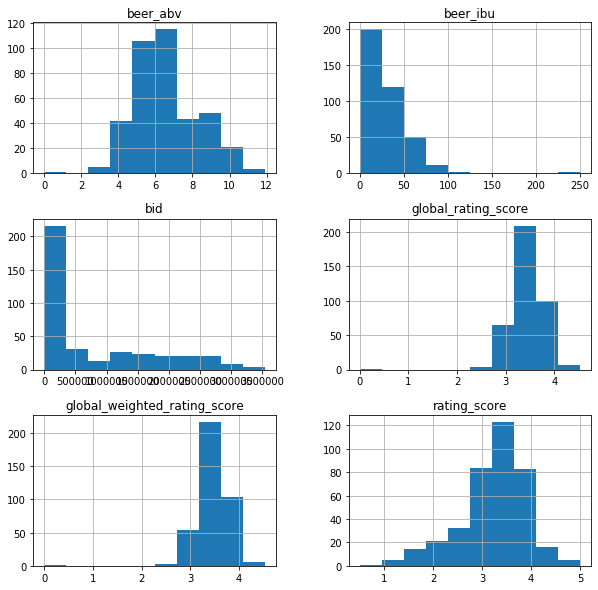

In [20]:
# Let's explore the numerical variables first, with a histogram plot
beers.hist(figsize=(10,10));

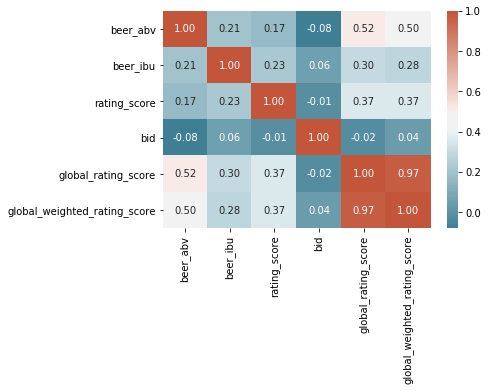

In [21]:
# next up: correlation plot
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
htmp = sns.heatmap(beers.corr(), cmap=cmap, annot=True, fmt=".2f");
bottom, top = htmp.get_ylim();
htmp.set_ylim(bottom + 0.5, top - 0.5);

C:\Users\jasper.kuller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


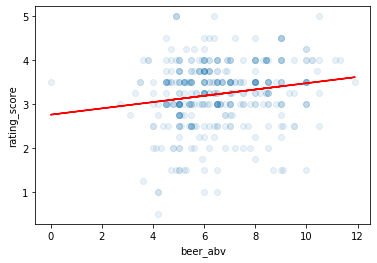

In [22]:
# Zooming in on rating_score & beer_abv: how does a scatter plot of those two look like?

X = beers.beer_abv
Y = beers.rating_score
X = np.array( [ [value,1] for value in X ] )
m, b = np.linalg.lstsq(X, Y)[0]
plt.plot(beers.beer_abv,beers.rating_score,'o', alpha=.1);
plt.ylabel('rating_score')
plt.xlabel('beer_abv')

# best fit line
x= beers.beer_abv
plt.plot(x, m*x + b,'r',label='Best Fit Line');

C:\Users\jasper.kuller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


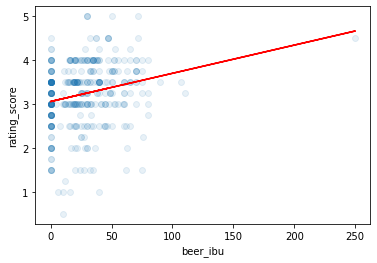

In [23]:
# Zooming in on rating_score & beer_ibu: how does a scatter plot of those two look like?

X = beers.beer_ibu
Y = beers.rating_score
X = np.array( [ [value,1] for value in X ] )
m, b = np.linalg.lstsq(X, Y)[0]
plt.plot(beers.beer_ibu,beers.rating_score,'o', alpha=.1);
plt.ylabel('rating_score')
plt.xlabel('beer_ibu')

# best fit line
x= beers.beer_ibu
plt.plot(x, m*x + b,'r',label='Best Fit Line');

In [24]:
beers = beers[beers.global_rating_score != 0.0]

C:\Users\jasper.kuller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


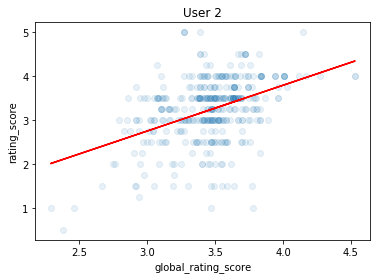

In [25]:
# Zooming in on rating_score & global_rating_score: how does a scatter plot of those two look like?

X = beers.global_rating_score
Y = beers.rating_score
X = np.array( [ [value,1] for value in X ] )
m, b = np.linalg.lstsq(X, Y)[0]
plt.plot(beers.global_rating_score,beers.rating_score,'o', alpha=.1);
plt.ylabel('rating_score')
plt.xlabel('global_rating_score')
plt.title('User 2')

# best fit line
x= beers.global_rating_score
plt.plot(x, m*x + b,'r',label='Best Fit Line');

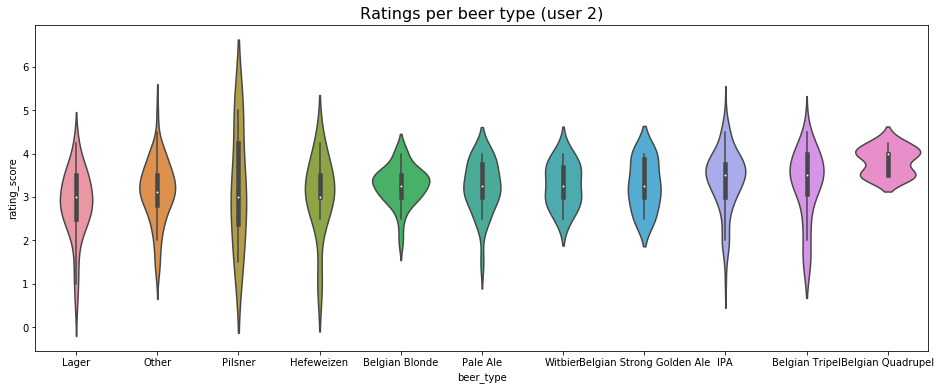

In [26]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.beer_type, beers.rating_score, order=['Lager','Other','Pilsner','Hefeweizen','Belgian Blonde','Pale Ale','Witbier','Belgian Strong Golden Ale','IPA','Belgian Tripel','Belgian Quadrupel'])
plt.title('Ratings per beer type (user 2)', fontsize=16)
plt.show()

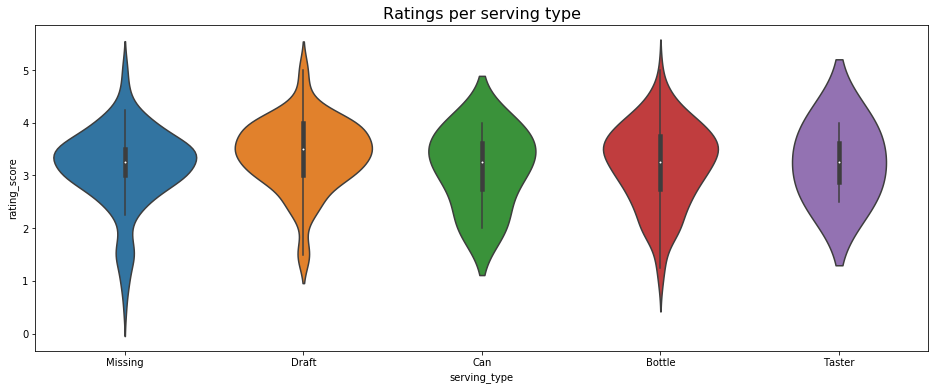

In [27]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.serving_type, beers.rating_score)
plt.title('Ratings per serving type', fontsize=16)
plt.show() 

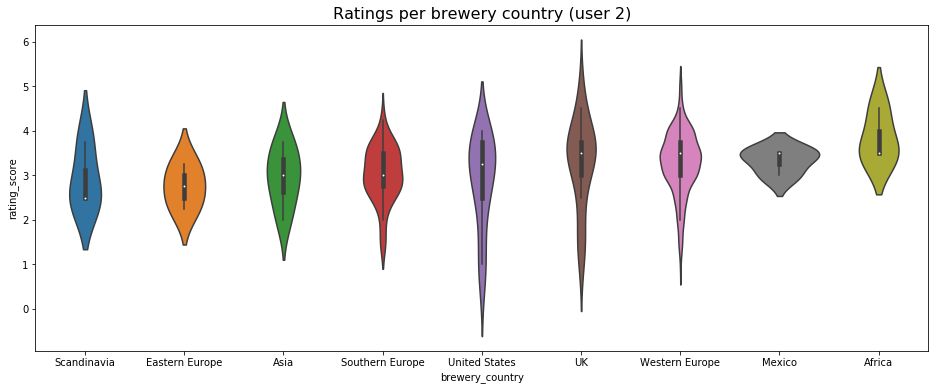

In [28]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.brewery_country, beers.rating_score, order=['Scandinavia','Eastern Europe','Asia','Southern Europe','United States','UK','Western Europe','Mexico','Africa'])
plt.title('Ratings per brewery country (user 2)', fontsize=16)
plt.show()

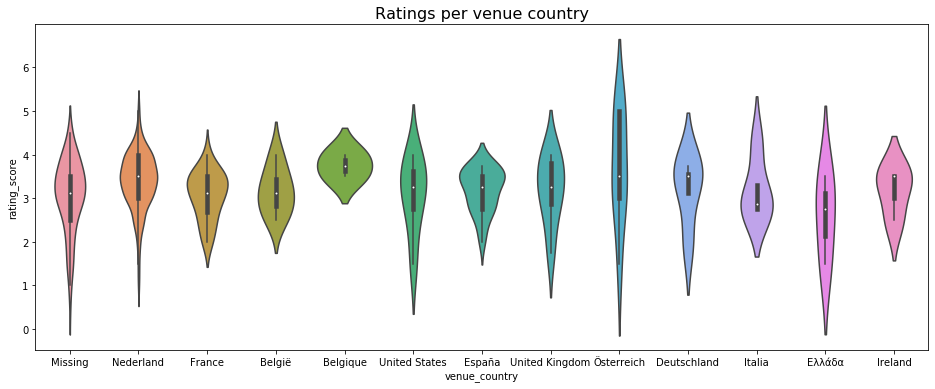

In [29]:
plt.figure(figsize=(16,6))
sns.violinplot(beers.venue_country, beers.rating_score)
plt.title('Ratings per venue country', fontsize=16)
plt.show()

## 3. Modelling

For sake of simplicity, we'll start with a linear regression model to predict rating_score.

In [30]:
# Let's see how the model does with numerical variables only
num_beers.describe()

,beer_abv,beer_ibu,rating_score,bid,global_rating_score,global_weighted_rating_score
count,384.000000,384.000000,384.000000,3.840000e+02,384.000000,384.000000
mean,6.519297,26.028646,3.228516,7.494015e+05,3.447656,3.473880
std,1.751411,25.874909,0.737180,9.641024e+05,0.343740,0.331587
min,0.000000,0.000000,0.500000,2.000000e+00,0.000000,0.000000
25%,5.100000,0.000000,3.000000,1.309225e+04,3.300000,3.377500
50%,6.200000,22.000000,3.250000,1.138620e+05,3.480000,3.505000
75%,8.000000,40.000000,3.750000,1.443948e+06,3.640000,3.640000
max,11.900000,250.000000,5.000000,3.537592e+06,4.530000,4.530000


In [31]:
beers.drop(columns=['bid','global_weighted_rating_score'], axis=1, inplace=True)
num_beers = beers.select_dtypes(include=['float64','int64']).copy()

In [32]:
# Split into explanatory and response variables
X = num_beers.drop('rating_score', axis=1)
y = num_beers['rating_score']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=1337) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
# Predict and score the model
y_test_preds = lm_model.predict(X_test) 


print("R2-score: ", metrics.r2_score(y_test, y_test_preds)) #Rsquared
print("MSE-score: ", metrics.mean_squared_error(y_test, y_test_preds)) #MSE.

R2-score:  0.08340682122766696
MSE-score:  0.5124627784589202


Now let's see if we can increase that score by adding categorical variables to our model.

In [33]:
# Dropping irrelevant columns
beers.drop(columns=['beer_name','brewery_name','created_at','brewery_city','brewery_state','venue_country','serving_type'], axis=1, inplace=True)
cat_beers = beers.select_dtypes(include=['object']).copy()
cat_beers.describe()

,beer_type,brewery_country
count,383,383
unique,11,9
top,IPA,Western Europe
freq,110,280


In [34]:
# Creating dummy columns with encoded values

cat_cols_lst = cat_beers.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [35]:
beers_new = create_dummy_df(beers, cat_cols_lst, dummy_na=False) 
print(beers_new.shape)

(383, 22)


In [36]:
beers_new.head(3)

,beer_abv,beer_ibu,rating_score,global_rating_score,beer_type_Belgian Quadrupel,beer_type_Belgian Strong Golden Ale,beer_type_Belgian Tripel,beer_type_Hefeweizen,beer_type_IPA,beer_type_Lager,beer_type_Other,beer_type_Pale Ale,beer_type_Pilsner,beer_type_Witbier,brewery_country_Asia,brewery_country_Eastern Europe,brewery_country_Mexico,brewery_country_Scandinavia,brewery_country_Southern Europe,brewery_country_UK,brewery_country_United States,brewery_country_Western Europe
4,9.0,47,4.0,3.72,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,8.0,20,3.0,3.67,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6,10.2,38,4.0,4.53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
#Split into explanatory and response variables
X = beers_new.drop('rating_score', axis=1)
y = beers_new['rating_score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1337)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = metrics.r2_score(y_test, y_test_preds)
train_score = metrics.r2_score(y_train, y_train_preds)

MSE_train = metrics.mean_squared_error(y_train, y_train_preds)
MSE_test = metrics.mean_squared_error(y_test, y_test_preds)

MAE_train = metrics.mean_absolute_error(y_train, y_train_preds)
MAE_test = metrics.mean_absolute_error(y_test, y_test_preds)

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_preds))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_preds))


#Rsquared score
print("R2-score test data: ", test_score)

#MAE score
print("MAE test data: ", MAE_test)

#MSE score
print("MSE test data: ", MSE_test)

#RMSE score
print("RMSE test data: ", RMSE_test)

R2-score test data:  0.12368942930062865
MAE test data:  0.5384205399423837
MSE test data:  0.4899409686367143
RMSE test data:  0.6999578334704987


Still not a very good score. Let's use a different algorithm: Random Forest.

In [38]:
#Split into explanatory and response variables
X = beers_new.drop('rating_score', axis=1)
y = beers_new['rating_score']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1337)

# Instantiate & fit
regressor = RandomForestRegressor(n_estimators=1000, max_depth=5) 
regressor.fit(X_train, y_train)

#Predict using your model
y_test_preds = regressor.predict(X_test)
y_train_preds = regressor.predict(X_train)

#Score using your model
test_score = metrics.r2_score(y_test, y_test_preds)
train_score = metrics.r2_score(y_train, y_train_preds)

MSE_train = metrics.mean_squared_error(y_train, y_train_preds)
MSE_test = metrics.mean_squared_error(y_test, y_test_preds)

MAE_train = metrics.mean_absolute_error(y_train, y_train_preds)
MAE_test = metrics.mean_absolute_error(y_test, y_test_preds)

RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_preds))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_preds))

#Rsquared score
print("R2-score training data: {}. R2-score test data: {}.".format(train_score, test_score))

#MAE score
print("MAE training data: {}. MAE test data: {}.".format(MAE_train, MAE_test))

#MSE score
print("MSE training data: {}. MSE test data: {}.".format(MSE_train, MSE_test))

#RMSE score
print("RMSE training data: {}. RMSE test data: {}.".format(RMSE_train, RMSE_test))

R2-score training data: 0.47114975323045405. R2-score test data: 0.13232270202829965.
MAE training data: 0.4007456819805041. MAE test data: 0.5142215742695998.
MSE training data: 0.2845575484963804. MSE test data: 0.4851141479362356.
RMSE training data: 0.5334393578434014. RMSE test data: 0.6965013624798128.
